In [1]:
# Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#For Strobl_dt

In [3]:
# Import the dataset
df = pd.read_csv('/content/importances.csv')

df.head()

,MDI_0,MDI_1,MDI_2,MDI_3,MDI_4,relevance,shrink_mode,lambda,replication
0,0.415126,0.042460,0.108011,0.175516,0.258887,0,hs,50.0,0
1,0.273542,0.079998,0.156807,0.222659,0.266994,0,hs_entropy,25.0,0
2,0.269781,0.092641,0.166304,0.210734,0.260540,0,hs_log_cardinality,25.0,0
3,0.208492,0.094305,0.251704,0.208929,0.236570,0,hs_permutation,100.0,0
4,0.172853,0.097330,0.271900,0.208872,0.249045,0,hs_global_permutation,100.0,0


In [4]:
# Check the NaN value is presence
'NaN value in the dataset' if df.isnull().sum().sum() > 0 else 'No NaN value'

'No NaN value'

In [5]:
# Check the min and max value
for index, feature in enumerate(df.columns[0:5]):
  print("Feature - {}: Min value # {} & Max value # {} ".format(feature,\
                                                                df.loc[:, feature].min(),\
                                                                df.loc[:, feature].max()))
  print("_"*80) if (index + 1) != len(df.columns[0:5]) else ''

Feature - MDI_0: Min value # 0.0290253580296111 & Max value # 0.4760723586382681 
________________________________________________________________________________
Feature - MDI_1: Min value # 0.022355282890282 & Max value # 0.8867932691774253 
________________________________________________________________________________
Feature - MDI_2: Min value # 0.0131981276109208 & Max value # 0.3219828694994377 
________________________________________________________________________________
Feature - MDI_3: Min value # 0.0158374957802921 & Max value # 0.5413168370140329 
________________________________________________________________________________
Feature - MDI_4: Min value # 0.0216698643276891 & Max value # 0.3909053330412206 


In [6]:
# Check the unique value of shrink_mode
df.loc[:, 'shrink_mode'].value_counts()

hs                       640
hs_entropy               640
hs_log_cardinality       640
hs_permutation           640
hs_global_permutation    640
Name: shrink_mode, dtype: int64

In [7]:
def generate_boxplots(df):
    '''
    Generate custom boxplots based on the provided DataFrame.

    Args:
        df (DataFrame): The input DataFrame containing relevant data.

    Returns:
        Boxplots
    '''
    # Customize Seaborn style and palette
    sns.set(style="whitegrid")

    # Define a custom color palette with attractive colors
    custom_palette = ["#3498db", "#e74c3c", "#2ecc71", "#f1c40f", "#9b59b6"]

    # Melt the DataFrame to convert it into a long format
    melted_df = pd.melt(df, id_vars=['relevance', 'shrink_mode'],
                        value_vars=['MDI_0', 'MDI_1', 'MDI_2', 'MDI_3', 'MDI_4'],
                        var_name='MDI', value_name='value')

    # Get the unique 'shrink_mode' values for the entire DataFrame
    unique_shrink_modes = melted_df['shrink_mode'].unique()

    # Define custom x-axis labels with LaTeX formatting
    x_labels = ['$X_1$', '$X_2$', '$X_3$', '$X_4$', '$X_5$']

    # Define the height of the FacetGrid plots (moderately larger)
    plot_height = 6

    # Iterate through unique 'relevance' values and create attractive diagrams
    for relevance_value in melted_df['relevance'].unique():
        # Filter the data for the current 'relevance' value
        subset_df = melted_df[melted_df['relevance'] == relevance_value]

        # Create a grid of boxplots for the current 'relevance' value with a larger height
        plt.figure(figsize=(12, plot_height))
        g = sns.FacetGrid(data=subset_df, col='relevance', sharey=True, height=plot_height)

        # Customize the color palette with custom colors
        g.map_dataframe(sns.boxplot, x='MDI', y='value', hue='shrink_mode', hue_order=unique_shrink_modes,
                        palette=custom_palette)

        # Customize x-axis labels with LaTeX formatting
        for ax in g.axes.flat:
            ax.set_xticklabels(x_labels)

        # Customize plot appearance
        g.set_axis_labels('MDI', 'Value')
        g.despine(left=True)

        # Customize the legend
        g.add_legend(loc='upper right', bbox_to_anchor=(1.2, 1))

        # Set the title to include the relevance number
        ax = g.axes[0, 0]
        ax.set_title(f'Relevance: {relevance_value}')

        # Save the plot to a file with a relevant filename (e.g., relevance_value.png)
        plt.savefig(f'Relevance_{relevance_value}_boxplot.png', bbox_inches='tight')

        # Show the plot
        plt.show()

        # Close the plot to free up memory
        plt.close()


<Figure size 1200x600 with 0 Axes>

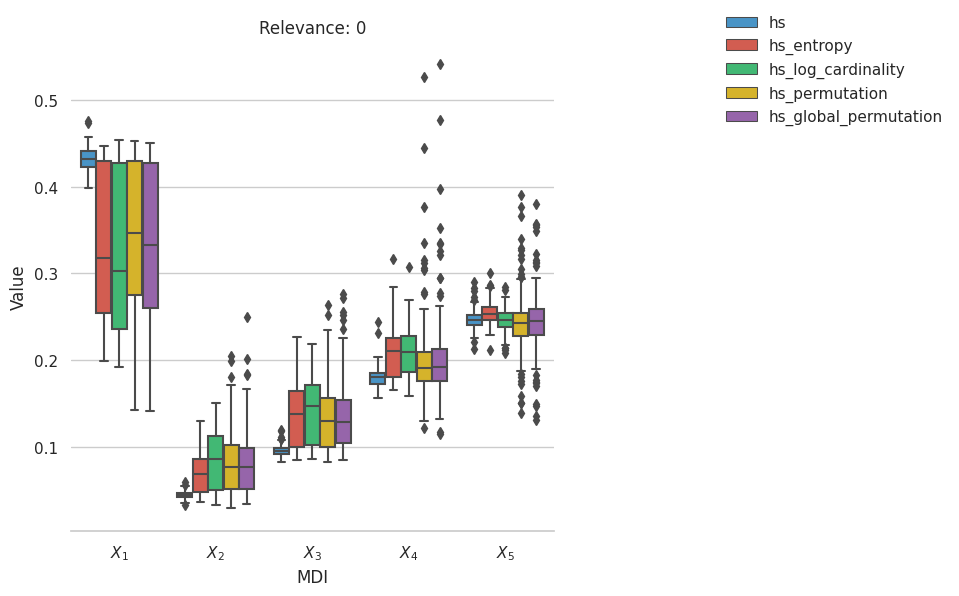

<Figure size 1200x600 with 0 Axes>

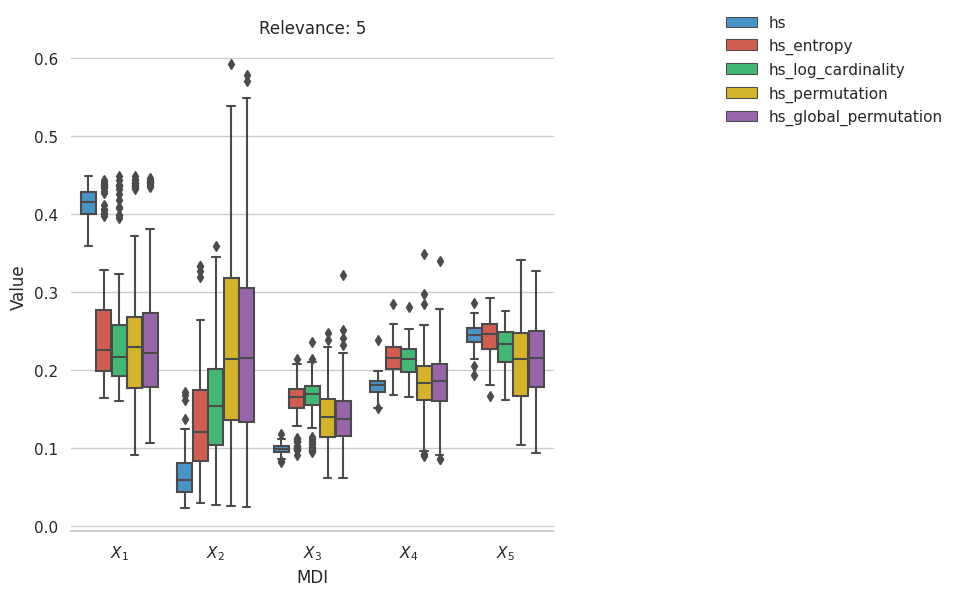

<Figure size 1200x600 with 0 Axes>

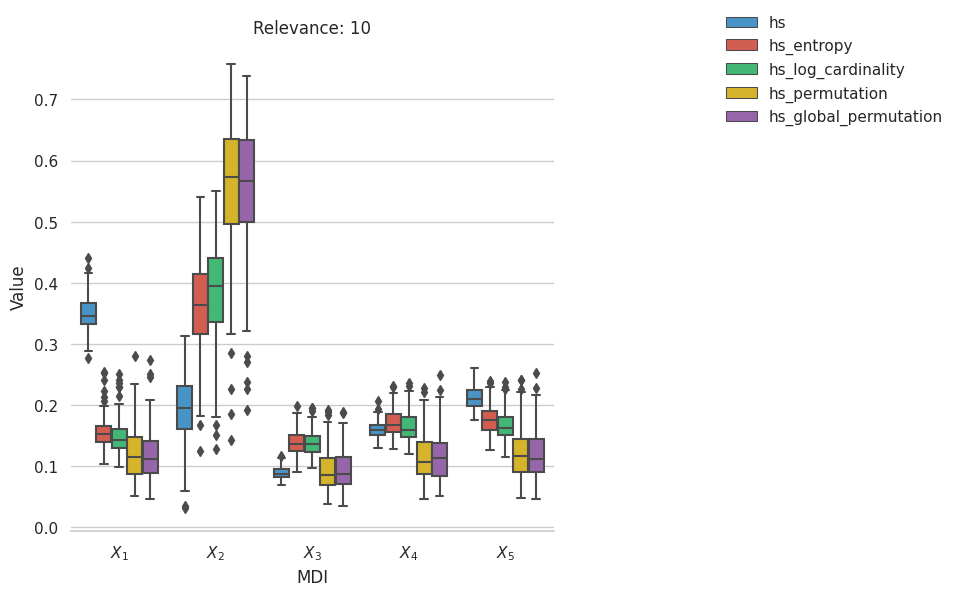

<Figure size 1200x600 with 0 Axes>

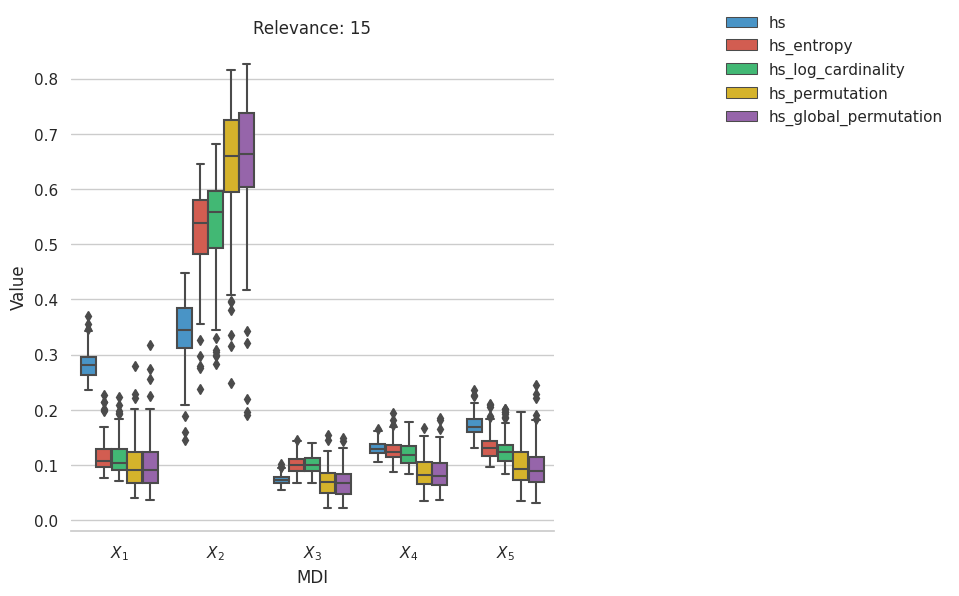

<Figure size 1200x600 with 0 Axes>

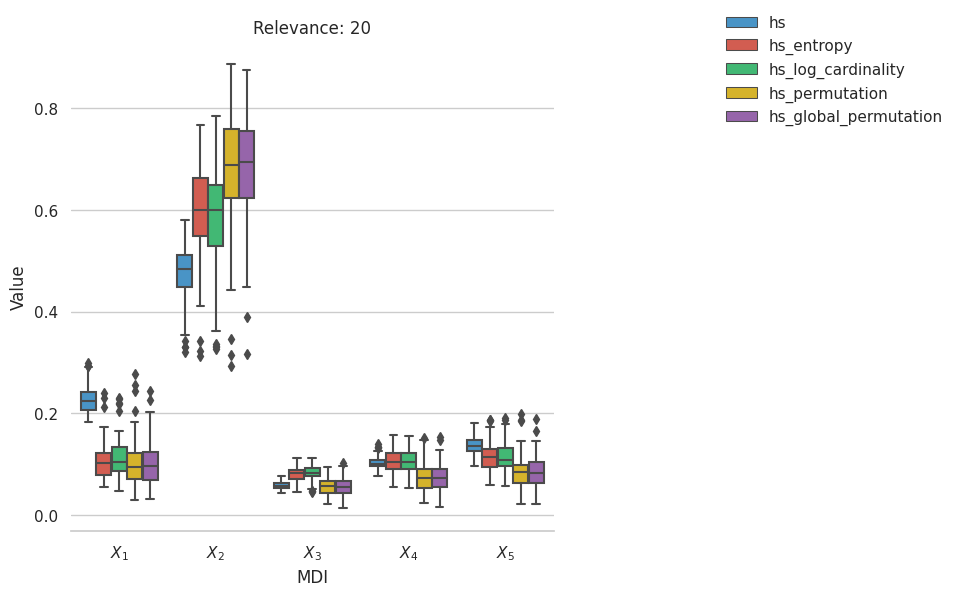

In [8]:
# Call the function
if __name__ == "__main__":
  generate_boxplots(df)